# 1. Logistic Regression for Binary Classification (2 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$.

#Answers 1-4:
1. We can see that $p(y|\mathbf{o})= p(y|\mathbf{o+c})$ by:

$$ p(y|\mathbf{o+c}) = \mathrm{softmax}(\mathbf{o+c})_y = \frac{\exp(o_y+c)}{\sum_{y'} \exp(o_{y'+c})} = \frac{\exp(c)\exp(o_y)}{\exp(c) \sum_{y'} \exp(o_{y'})} = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})} = \mathrm{softmax}(\mathbf{o})_y = p(y|\mathbf{o})$$

2. The proof is given by:  

$$p(y=1|o) = \frac{\exp(o)}{\exp(0) + \exp(o)} = \frac{\exp(o)}{1 + \exp(o)} \cdot \frac{\exp(-o)}{\exp(-o)}= \frac{1}{1 + \exp(-o)}$$

3. Since $p(y=-1|o)+ p(y=1|o) = 1$, we can find $p(y=-1|o)$ by:

 $$p(y=-1|o) = 1 - p(y=1|o) = 1 - \frac{1}{1 + \exp(-o)} = \frac{1 + \exp(-o)}{1 + \exp(-o)} - \frac{1}{1 + \exp(-o)} = \frac{\exp(-o)}{1 + \exp(-o)} \cdot \frac{\exp(o)}{\exp(o)} = \frac{1}{1 + \exp(o)}$$
Given both results for $p(y=-1|o)$ and $p(y=1|o)$ we can see that:
$$p(y|o) = \frac{1}{1 + \exp(-y \cdot o)}$$
Therefore:
$$\log p(y|o) = \log (\frac{1}{1 + \exp(-y \cdot o)}) = -\log(1 + \exp(-y \cdot o))$$
$$ -\log p(y|o) = \log(1 + \exp(-y \cdot o)) $$

4. For y = 1,:

For $o\to\infty$:
$$ \lim_{o\to\infty} \exp(-o) = 0, $$
$$\exp(-o) = u,$$
$$\lim_{u\to 0}  \log(1 + u) = 0, $$
$$\lim_{o\to\infty}  \log(1 + \exp(-o)) = 0. $$

For $o\to -\infty$:

$$ \lim_{o\to-\infty} \exp(-o) = \infty, $$
$$\exp(-o) = u,$$
$$\lim_{u\to \infty}  \log(1 + u) = \infty, $$
$$\lim_{o\to-\infty}  \log(1 + \exp(-o)) = \infty. $$

# 2. Implementing the logistic loss (1.5 points)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in numpy.
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Derive the derivative of $l(y,o)$ and show your work. Then, in a new plot, plot derivative of $l(y,o)$ with respect to $o$ for $y \in \{-1, 1\}$ and for $o \in [-5, 5]$ without using any automatic differentiation software (e.g. Pytorch, TensorFlow, JAX, etc.).
1. In a new plot, plot $l(y,o)$ with $y = 1$ and $o âˆˆ [-1000, 1000]$. What happens for large positive and large negative values of $o$? Why?

### Answer 1

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def logistic_loss(y, o):
    loss = np.log(1 + np.exp(-y * o))
    return loss

### Answer 2

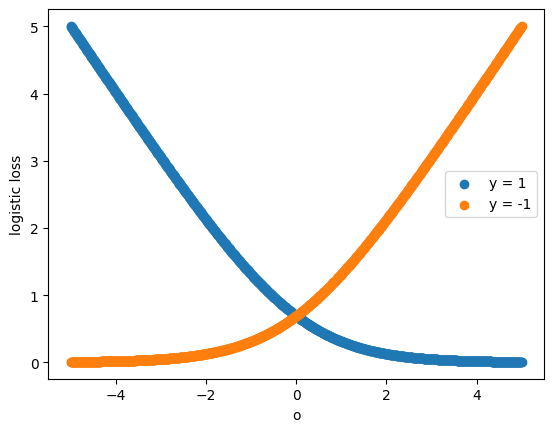

In [ ]:
o = np.linspace(-5, 5, 1000)
plt.scatter( o, logistic_loss(1, o), label = 'y = 1')
plt.scatter( o, logistic_loss(-1, o), label = 'y = -1')
plt.ylabel('logistic loss')
plt.xlabel('o')
plt.legend()

### Answer 3:
We first apply the chain rule:
$$ u = 1 + exp(-y \cdot o)$$
$$ \dfrac{d}{du}[log(u)]\dfrac{d}{do}[1+ exp(-y \cdot o)] = \frac{1}{u}\dfrac{d}{do}[1+ exp(-y \cdot o)] $$
$$= \frac{1}{1 + exp(-y \cdot o)}\dfrac{d}{do}[1+ exp(-y \cdot o)] $$
$$=  \frac{-y \cdot exp(-y \cdot o) }{1 + exp(-y \cdot o)}$$


In [ ]:
def logistic_loss_derivative(y, o):
    loss_der = (-y * np.exp(-y * o)) / (1+ np.exp(-y * o))
    return loss_der

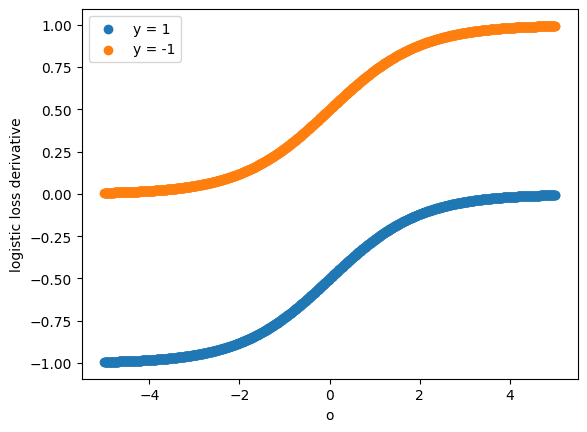

In [ ]:
o = np.linspace(-5, 5, 1000)
plt.scatter( o, logistic_loss_derivative(1, o), label = 'y = 1')
plt.scatter( o, logistic_loss_derivative(-1, o), label = 'y = -1')
plt.ylabel('logistic loss derivative')
plt.xlabel('o')
plt.legend()

### Answer 4:
We can observe that for large positive and negative values of x, the logistic loss derivative assymptotes to 0 and -1 respectively. This can be expected as the function similarity to softmax(o).


<ipython-input-7-d4eb568841ec>:2: RuntimeWarning: overflow encountered in exp
  loss_der = (-y * np.exp(-y * o)) / (1+ np.exp(-y * o))
<ipython-input-7-d4eb568841ec>:2: RuntimeWarning: invalid value encountered in divide
  loss_der = (-y * np.exp(-y * o)) / (1+ np.exp(-y * o))


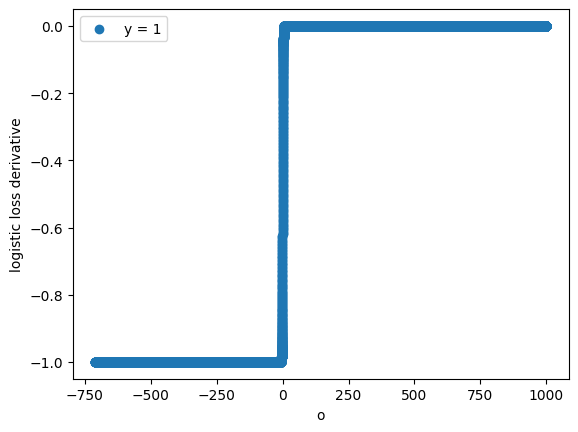

In [ ]:
o = np.linspace(-1000, 1000, 100000)
plt.scatter( o, logistic_loss_derivative(1, o), label = 'y = 1')
plt.ylabel('logistic loss derivative')
plt.xlabel('o')
plt.legend()

# 3. Implementing logistic regression (1.5 points)

Implement a basic logistic regression model and fit it to the data from the new `generate_data` function (below) using gradient descent.
Your model should take the form `o = m*x + b`, where `o` is the output (logits), `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
Train the model using the logistic loss function you derived in the previous problem.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
Print out or plot the loss over the course of training.
You should be able to get a loss that is close to zero by the end of training - make sure you achieve this and **explain why**.

##Answer 3
We can observe that the loss is minimized throughout the training course. A binary logistic loss and its derivatives according to `m` and `b` are computed at each epoch. Following that, individual learning `lr_b` and `lr_m` rates for each parameter control the gradient descent step size. The loss curve plotted displays that the loss converges to near-zero values with sufficient epochs.

In [ ]:
import numpy as np

def generate_data():
    size = 1000
    rng = np.random.default_rng(seed=0)
    y = 2*rng.integers(0, 2, size) - 1
    x = rng.standard_normal((1000,)) + 4*y
    return x, y

In [ ]:
x,y = generate_data()

In [ ]:
def logistic_regression(x, y, epochs, lr_m, lr_b):
    m = 0
    b = 0
    loss_log = []
    for epoch in range(epochs):
        #compute o, loss, and gradients
        o = m*x + b
        L = np.mean(logistic_loss(y, o))
        L_2 = np.mean([logistic_loss(y[i],o[i]) for i in range(len(y))])
        L_o_gradient = np.mean(logistic_loss_derivative(y, o))
        L_m_gradient = np.mean(x* L_o_gradient)
        L_b_gradient = 1*L_o_gradient
        #apply gradients to m and b
        m -= lr_m * L_m_gradient
        b -= lr_b * L_b_gradient
        loss_log.append(L)
        print(epoch,'- Loss: ', L)
    return m, b , loss_log

In [ ]:
m, b , loss_log = logistic_regression(x, y, 2000, 1, 0.01)

0 - Loss:  0.6931471805599454
1 - Loss:  0.671905673257302
2 - Loss:  0.6516223647285002
3 - Loss:  0.6322527310977745
4 - Loss:  0.6137535310473086
5 - Loss:  0.5960829152862119
6 - Loss:  0.579200508363019
7 - Loss:  0.5630674658502064
8 - Loss:  0.5476465098976765
9 - Loss:  0.5329019460461193
10 - Loss:  0.5187996640309991
11 - Loss:  0.505307125111112
12 - Loss:  0.49239333823692344
13 - Loss:  0.48002882714500983
14 - Loss:  0.46818559023517
15 - Loss:  0.4568370548630376
16 - Loss:  0.4459580274683016
17 - Loss:  0.4355246407602326
18 - Loss:  0.42551429900011406
19 - Loss:  0.4159056222553383
20 - Loss:  0.40667839035251535
21 - Loss:  0.39781348712653175
22 - Loss:  0.38929284544827536
23 - Loss:  0.3810993934146154
24 - Loss:  0.3732170019989618
25 - Loss:  0.3656304343880155
26 - Loss:  0.35832529716883593
27 - Loss:  0.3512879934788282
28 - Loss:  0.3445056781884546
29 - Loss:  0.33796621515129716
30 - Loss:  0.33165813652748577
31 - Loss:  0.32557060416353695
32 - Loss:  0

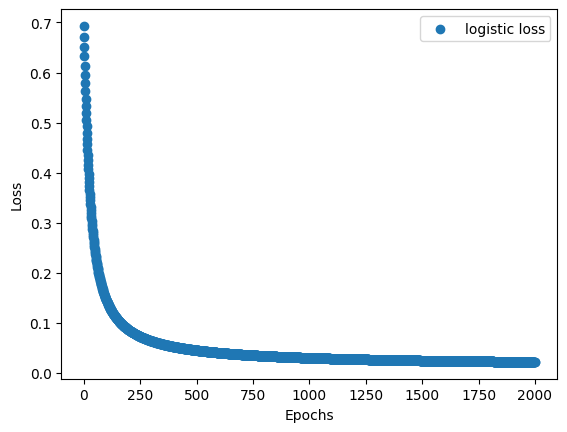

In [ ]:
plt.scatter(np.arange(len(loss_log)), loss_log, label = 'logistic loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()